## Financial Data Analysis CSV

### Objectives

Master the skills required to load, manipulate, analyze, and export CSV data within a Jupyter Notebook environment.

#### 1. **Loading CSV Data into Jupyter**:
- Use Python's built-in csv module to read data.
- Load the CSV data into a DataFrame using the `pandas` library.
- Display the first few rows of the dataset to understand its structure.

#### 2. **Basic Data Exploration**:
- Determine the number of rows and columns in the dataset.
- Identify and handle missing values in the dataset.
- Obtain summary statistics for numerical columns.

#### 3. **Data Manipulation and Cleaning**:
- Filter clients based on specific financial criteria.
- Modify existing columns, if necessary, to derive new metrics.
- Identify and handle duplicate client entries.

#### 4. **Data Analysis with CSV Data**:
- Group clients by financial advisors and calculate aggregate metrics.
- Identify clients with the highest and lowest profits.
- Analyze the distribution of clients across different profit ranges.

#### 5. **Visualization with CSV Data**:
- Plot a bar chart showing the profit distribution across clients.
- Visualize the distribution of clients among different financial advisors using a pie chart.

#### 6. **Advanced Analysis**:
- Analyze correlations between different financial metrics, such as budget allocation and actual profit.
- Predict future profits based on historical data using basic regression techniques.

#### 7. **Exporting Data**:  
- Save the manipulated and analyzed data back to a CSV file.
- Export subsets of data, such as top-performing clients, to new CSV files.


#### Step 1.1: Use Python's built-in csv module to read data.

In [25]:
import csv

# Open the CSV file for reading
with open('profitable_clients_sorted_from_json.csv', 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)

#### Step 1.2: Load CSV data using the pandas library.

In [26]:
import pandas as pd

# Load the CSV data into a DataFrame
df = pd.read_csv('profitable_clients_sorted_from_json.csv')

#### Step 1.3: Display the first few rows of the dataset to understand its structure.

In [27]:
# Display the first few rows of the DataFrame
df.head()

,ClientID,ClientName,Budget,Expenses,Revenue,Profit,FinancialAdvisor
0,112,Yellow Apple,90000,84500,73000,49000.0,Hank Yellow
1,111,Orange Mango,92000,84000,143000,41000.0,Frank Black
2,102,Beta Inc,75000,50000,90000,40000.0,Bob Smith
3,104,Delta Co,85000,70000,110000,40000.0,Dave Brown
4,110,Juliet Co,99000,94000,130000,36000.0,Jack Violet


### Step 2: Basic Data Exploration

#### Step 2.1: Determine the number of rows and columns in the dataset.

In [28]:
# Assuming you've already loaded your data into a DataFrame named 'df'
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")

The dataset has 13 rows and 7 columns.


#### Step 2.2: Identify and handle missing values in the dataset.

In [29]:
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Number of missing values for each column:")
print(missing_values)

# Handle missing values
# For this dataset, we'll calculate the Profit as (Revenue - Expenses) for the missing values.
df['Profit'].fillna(df['Revenue'] - df['Expenses'], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())



Number of missing values for each column:
ClientID            0
ClientName          0
Budget              0
Expenses            0
Revenue             0
Profit              2
FinancialAdvisor    0
dtype: int64

Missing values after handling:
ClientID            0
ClientName          0
Budget              0
Expenses            0
Revenue             0
Profit              0
FinancialAdvisor    0
dtype: int64


#### Step 2.3: Obtain summary statistics for numerical columns.

In [36]:
# Obtain summary statistics and round to 2 decimal places
summary_statistics = df.describe().round(1)
print("\nSummary statistics for numerical columns:\n")
print(summary_statistics)



Summary statistics for numerical columns:

       ClientID   Budget  Expenses   Revenue   Profit
count      13.0     13.0      13.0      13.0     13.0
mean      120.7  76153.8   73719.2   92384.6  34242.3
std        51.3  24922.7   27551.7   43444.5  10316.9
min       101.0   9000.0     850.0    5000.0   4150.0
25%       104.0  70000.0   70000.0   80000.0  35000.0
50%       107.0  85000.0   84500.0  105000.0  35000.0
75%       110.0  92000.0   90000.0  120000.0  40000.0
max       291.0  99000.0  105000.0  143000.0  49000.0


### Step 3: Data Manipulation and Cleaning

#### Step 3.1: Filter clients based on specific financial criteria.

In [8]:
# Initialize an empty set to store unique financial advisors
unique_advisors = set()

# Loop through each client's data to add the advisor's name to the set
for client in financial_data:
    unique_advisors.add(client['FinancialAdvisor'])

print("Unique Financial Advisors:")
for advisor in unique_advisors:
    print(advisor)


Unique Financial Advisors:
Ivy Red
Hank Yellow
Eve Green
Bob Smith
Alice Johnson
Carol White
Dave Brown
Frank Black
Grace Blue
Jack Violet


#### Step 3.2: Determine the Number of Clients Each Advisor Handles

In [9]:
# Initialize an empty dictionary to store the count of clients each advisor handles
advisor_counts = {}

# Loop through each client's data to update the count for each advisor
for client in financial_data:
    advisor = client['FinancialAdvisor']
    if advisor in advisor_counts:
        advisor_counts[advisor] += 1
    else:
        advisor_counts[advisor] = 1

print("Number of Clients Each Advisor Handles:")
for advisor, count in advisor_counts.items():
    print(f"{advisor}: {count} clients")


Number of Clients Each Advisor Handles:
Alice Johnson: 1 clients
Bob Smith: 1 clients
Carol White: 1 clients
Dave Brown: 1 clients
Eve Green: 1 clients
Frank Black: 2 clients
Grace Blue: 1 clients
Hank Yellow: 2 clients
Ivy Red: 1 clients
Jack Violet: 1 clients


#### Step 3.3: Identify the Advisor Managing the Client with the Highest Profit

In [10]:
# Initialize variables to store the highest profit value and corresponding advisor's name
highest_profit = float('-inf')  # Start with a very low value
advisor_highest_profit = ""

# Loop through each client's data to find the highest profit and corresponding advisor
for client in financial_data:
    if client['Profit'] > highest_profit:
        highest_profit = client['Profit']
        advisor_highest_profit = client['FinancialAdvisor']

print(f"Advisor Managing the Client with the Highest Profit: {advisor_highest_profit}")


Advisor Managing the Client with the Highest Profit: Hank Yellow


### Step 4: Budget analysis

#### Step 4.1: Identify Clients Whose Actual Expenses Exceeded Their Budget


In [11]:
# List to store clients whose expenses exceeded their budget
over_budget_clients = []

# Loop through each client's data
for client in financial_data:
    if client['Expenses'] > client['Budget']:
        over_budget_clients.append(client['ClientName'])

print("Clients Whose Expenses Exceeded Their Budget:")
for client_name in over_budget_clients:
    print(client_name)


Clients Whose Expenses Exceeded Their Budget:
Acme Corp
Foxtrot Enterprises


#### Step 4.2: Determine the Total Amount by Which the Budget Was Exceeded for These Clients

In [12]:
# Variable to store the total amount by which the budget was exceeded
total_over_budget = 0

# Loop through each client's data
for client in financial_data:
    if client['Expenses'] > client['Budget']:
        total_over_budget += (client['Expenses'] - client['Budget'])

print(f"Total Amount by Which the Budget Was Exceeded: ${total_over_budget}")


Total Amount by Which the Budget Was Exceeded: $75000


### Step 5: Profit Margin Analysis

#### Step 5.1: Calculate the Profit Margin for Each Client

In [13]:
# List to store profit margins for each client
profit_margins = []

# Loop through each client's data
for client in financial_data:
    profit_margin = (client['Profit'] / client['Revenue']) * 100
    profit_margins.append({
        'ClientName': client['ClientName'],
        'ProfitMargin': profit_margin
    })

print(profit_margins)

[{'ClientName': 'Acme Corp', 'ProfitMargin': 700.0}, {'ClientName': 'Beta Inc', 'ProfitMargin': 44.44444444444444}, {'ClientName': 'Charlie LLC', 'ProfitMargin': 43.75}, {'ClientName': 'Delta Co', 'ProfitMargin': 36.36363636363637}, {'ClientName': 'Echo Ltd', 'ProfitMargin': 29.166666666666668}, {'ClientName': 'Foxtrot Enterprises', 'ProfitMargin': 35.0}, {'ClientName': 'Golf Corp', 'ProfitMargin': 28.57142857142857}, {'ClientName': 'Hotel Inc', 'ProfitMargin': 26.08695652173913}, {'ClientName': 'India LLC', 'ProfitMargin': 28.000000000000004}, {'ClientName': 'Juliet Co', 'ProfitMargin': 27.692307692307693}, {'ClientName': 'Orange Mango', 'ProfitMargin': 28.671328671328673}, {'ClientName': 'Yellow Apple', 'ProfitMargin': 67.12328767123287}]


#### Step 5.2: Rank Clients Based on Their Profit Margins

In [14]:
# Sort the clients based on profit margins in descending order
ranked_clients = sorted(profit_margins, key=lambda x: x['ProfitMargin'], reverse=True)

print("Clients Ranked by Profit Margins (Highest to Lowest):")
for client in ranked_clients:
    print(f"{client['ClientName']}: {client['ProfitMargin']:.2f}%")


Clients Ranked by Profit Margins (Highest to Lowest):
Acme Corp: 700.00%
Yellow Apple: 67.12%
Beta Inc: 44.44%
Charlie LLC: 43.75%
Delta Co: 36.36%
Foxtrot Enterprises: 35.00%
Echo Ltd: 29.17%
Orange Mango: 28.67%
Golf Corp: 28.57%
India LLC: 28.00%
Juliet Co: 27.69%
Hotel Inc: 26.09%


### Step 6: Visualization

#### Step 6.1: Plot a Bar Chart Showing the Profit of Each Client

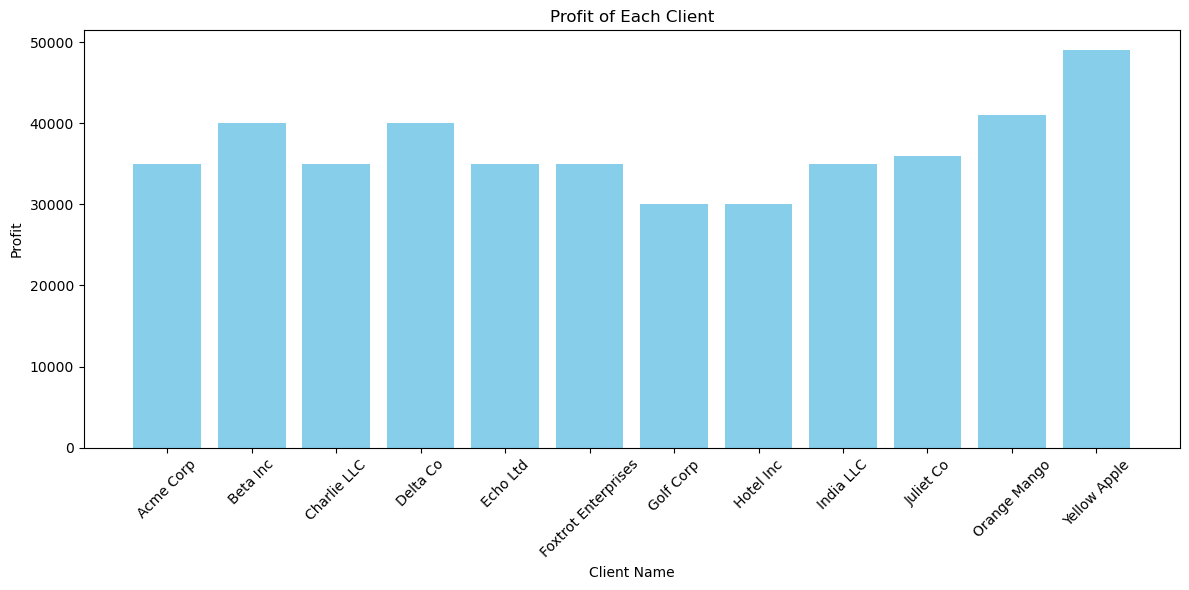

In [15]:
# !pip install matplotlib
import matplotlib.pyplot as plt

# Extract client names and their profits
client_names = [client['ClientName'] for client in financial_data]
profits = [client['Profit'] for client in financial_data]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(client_names, profits, color='skyblue')
plt.xlabel('Client Name')
plt.ylabel('Profit')
plt.title('Profit of Each Client')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 6.2: Plot a Pie Chart Showing the Distribution of Clients Among Different Financial Advisors


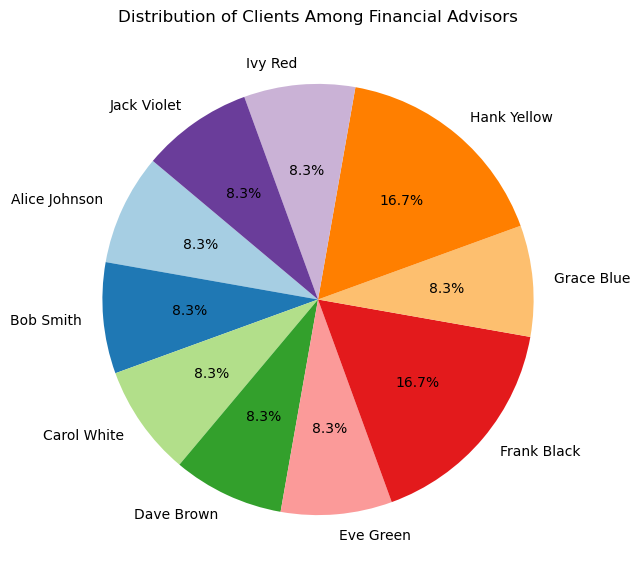

In [16]:
from collections import Counter

advisor_names = [client['FinancialAdvisor'] for client in financial_data]
advisor_counts = Counter(advisor_names)

# Extracting data for pie chart
labels = list(advisor_counts.keys())
sizes = list(advisor_counts.values())

# Plotting
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Clients Among Financial Advisors')
plt.show()


### Step 6: Advanced analysis

#### Step 6.1: Group clients based on profit ranges and determine the number of clients in each range

In [17]:
from collections import defaultdict

# Define profit ranges
profit_ranges = {
    "0-10k": (0, 10000),
    "10k-20k": (10000, 20000),
    "20k-30k": (20000, 30000),
    "30k-40k": (30000, 40000),
    "40k+": (40000, float('inf'))
}

# Categorize clients into profit ranges
profit_bins = defaultdict(int)

for client in financial_data:
    profit = client['Profit']
    for range_name, (low, high) in profit_ranges.items():
        if low <= profit < high:
            profit_bins[range_name] += 1
            break

print(profit_bins)


defaultdict(<class 'int'>, {'30k-40k': 8, '40k+': 4})


#### Step 6.2: Identify any correlations between budget allocation and actual profit


In [18]:
import numpy as np

budgets = [client['Budget'] for client in financial_data]
profits = [client['Profit'] for client in financial_data]

correlation_coefficient = np.corrcoef(budgets, profits)[0, 1]

print(f"Correlation Coefficient between Budget and Profit: {correlation_coefficient:.2f}")


Correlation Coefficient between Budget and Profit: 0.17


#### Step 6.3: Predict the next year's profit for each client based on their current data

In [19]:
from sklearn.linear_model import LinearRegression

# Reshape data for scikit-learn
X = np.array(budgets).reshape(-1, 1)
y = np.array(profits)

# Train a linear regression model
# The LinearRegression() function creates a new linear regression model.
# Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

# The `.fit(X, y)` method trains the linear regression model using the provided data.
# `X` is the independent variable (or variables, in the case of multiple regression). In our case, it's the budget.
# `y` is the dependent variable we're trying to predict, which is the profit in our scenario.

# Once the model is trained with `.fit()`, it can be used to make predictions on new data using the `.predict()` method.

model = LinearRegression().fit(X, y)  # Create and train a linear regression model using the budgets (X) to predict profits (y).

# Predict next year's profit
predicted_profits = model.predict(X)

for client_name, predicted_profit in zip(client_names, predicted_profits):
    print(f"{client_name} next year prediction: ${predicted_profit:.2f}")


Acme Corp next year prediction: $34966.71
Beta Inc next year prediction: $36370.88
Charlie LLC next year prediction: $35528.38
Delta Co next year prediction: $36932.54
Echo Ltd next year prediction: $37494.21
Foxtrot Enterprises next year prediction: $36090.04
Golf Corp next year prediction: $36651.71
Hotel Inc next year prediction: $37213.37
India LLC next year prediction: $37494.21
Juliet Co next year prediction: $37718.87
Orange Mango next year prediction: $37325.71
Yellow Apple next year prediction: $37213.37


### 8 Data Export

#### Step 8.1: Save the analyzed data, including any new columns or calculations, into a new JSON file.


In [20]:
with open('analyzed_data.json', 'w') as file:
    json.dump({"FinancialData": financial_data}, file)

#### Step 8.2: Export a subset of the data (e.g., top 5 profitable clients) into a CSV file.

In [22]:
import csv

# Sort the data based on profit in descending order
top_clients = sorted(financial_data, key=lambda x: x['Profit'], reverse=True)[:]

# Write the top clients to a CSV file
with open('profitable_clients_sorted_from_json.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=top_clients[0].keys())
    writer.writeheader()
    for client in top_clients:
        writer.writerow(client)